### Comparison betweeen clusters

### Data loading

In [2]:
import pandas as pd
cluster = pd.read_csv('../cluster_hippo.csv', index_col=0)
trimap = pd.read_csv('../trimap_hippo.csv', index_col=0)

In [3]:
chronos = pd.read_csv("../data/CRISPR_gene_effect.csv",index_col=0)
chronos.columns = [c.split()[0].upper() + '_Chronos' for c in chronos.columns]
expression = pd.read_csv("../data/CCLE_expression.csv", index_col=0)
expression.columns = [c.split()[0].upper()+'_Expression' for c in expression.columns]
sample_info = pd.read_csv("../data/sample_info.csv", index_col=0)
ch_ex = chronos.merge(expression, right_index=True, left_index=True).dropna()
ch_ex['Cluster'] = cluster['Cluster']

### Heatmap (Figs. 2d, h, 3a, S4a)

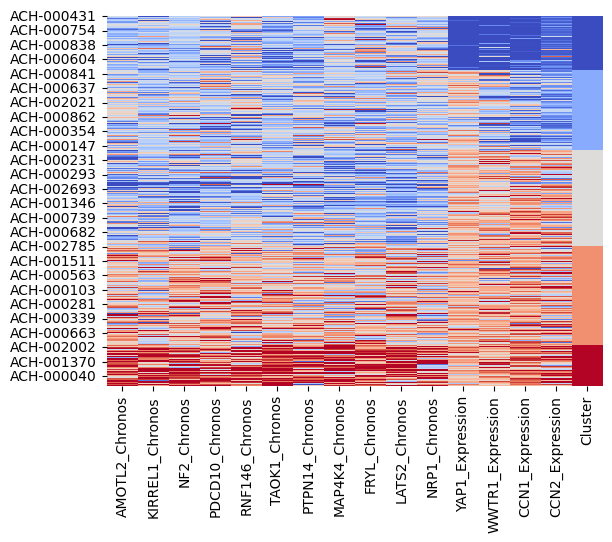

In [ ]:
#Fig. 2d
import seaborn as sns
import matplotlib.pyplot as plt
hippo_chr=['AMOTL2', 'KIRREL1', 'NF2', 'PDCD10', 'RNF146', 'TAOK1', 'PTPN14', 'MAP4K4', 'FRYL',  'LATS2',  'NRP1']
hippo_exp=['YAP1','WWTR1','CCN1','CCN2']
features = [gene + '_Chronos' for gene in hippo_chr] + [gene + '_Expression' for gene in hippo_exp] 
ch_ex2 = ch_ex[features + ['Cluster']].copy().sort_values('Cluster')
ch_ex2 = (ch_ex2-ch_ex2.mean())/ch_ex2.std()
#ch_ex2 = ch_ex2.join(trimap, how='inner').sort_values('Cluster')
ch_ex2 = ch_ex2.dropna()    
sns.heatmap(ch_ex2, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)

plt.show()

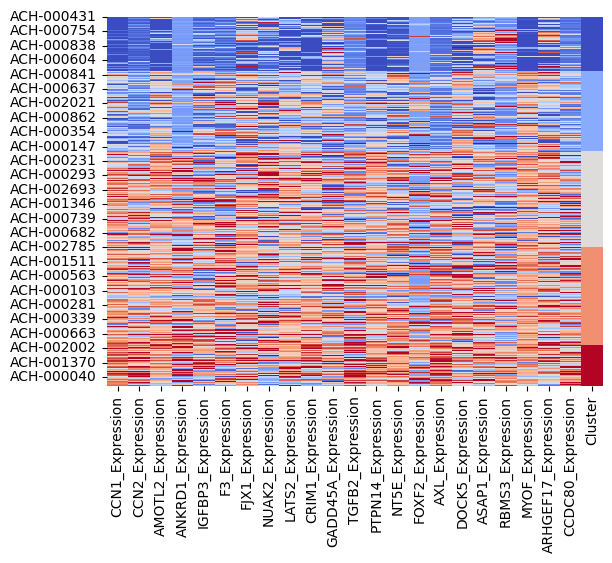

In [5]:
#Fig. S4a
hippo_chr=['AMOTL2', 'KIRREL1', 'NF2', 'PDCD10', 'RNF146', 'TAOK1', 'PTPN14', 'MAP4K4', 'FRYL',  'LATS2',  'NRP1']
hippo_exp=['YAP1','WWTR1','CCN1','CCN2']

hippo_chr=[]#'AMOTL2', 'KIRREL1', 'NF2', 'PDCD10', 'RNF146', 'TAOK1', 'PTPN14', 'MAP4K4', 'FRYL',  'LATS2',  'NRP1']
hippo_exp=['CCN1','CCN2','AMOTL2','ANKRD1', 'IGFBP3', 'F3', 'FJX1', 'NUAK2', 
           'LATS2', 'CRIM1', 'GADD45A', 'TGFB2', 'PTPN14', 'NT5E', 'FOXF2', 
           'AXL', 'DOCK5', 'ASAP1', 'RBMS3', 'MYOF', 'ARHGEF17', 'CCDC80',]
features = [gene + '_Chronos' for gene in hippo_chr] + [gene + '_Expression' for gene in hippo_exp] 
ch_ex2 = ch_ex[features + ['Cluster']].copy().sort_values('Cluster')
ch_ex2 = (ch_ex2-ch_ex2.mean())/ch_ex2.std()

sns.heatmap(ch_ex2, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)

plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

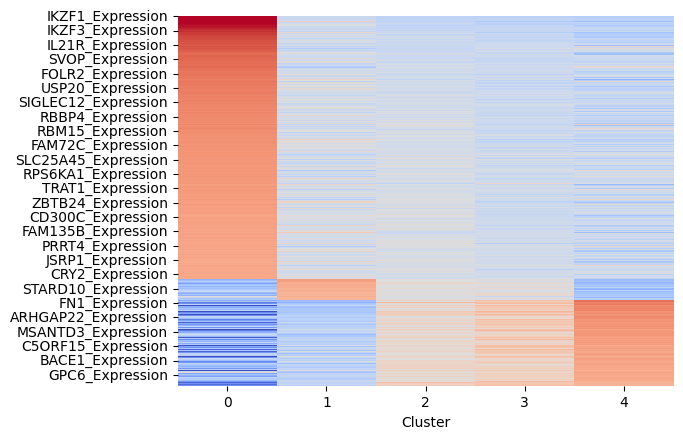

In [7]:
#Fig. 2h
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

norm_ch_ex = pd.DataFrame(StandardScaler().fit_transform(ch_ex), columns=ch_ex.columns, index=ch_ex.index)
norm_ch_ex['Cluster'] = ch_ex['Cluster']
ch_exg = norm_ch_ex.groupby("Cluster").mean().copy().T

from tqdm.notebook import tqdm
results = []

for i in tqdm(range(5)):
    df_filtered = ch_exg[ch_exg[i] == ch_exg.max(axis=1)].copy()
    #df_filtered = ch_exg[ch_exg[i] == ch_exg.min(axis=1)].copy()

    df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
    df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=False)
    #df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=True)

    df_sorted = df_sorted[df_sorted['diff_to_other_mean'] > 0.75]
    results.append(df_sorted.index.tolist())

rows = []
for i in range(5):
    ex_results = [r for r in results[i] if 'Expression' in r]
    rows += ex_results#[:50]
a = ch_exg.loc[rows]

results_ex = results
high_exp = ex_results  #Cluster4=Hippo_strong

sns.heatmap(a, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)
plt.savefig("../result/figure.svg")
plt.show()

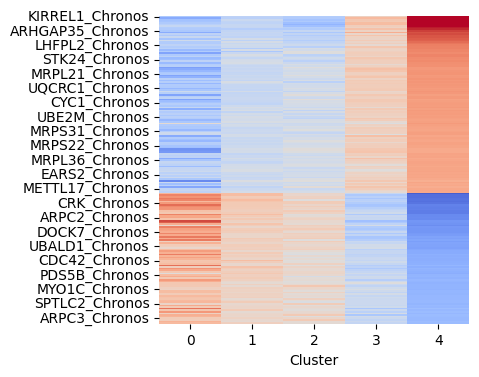

In [9]:
#Fig. 3a
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

norm_ch_ex = pd.DataFrame(StandardScaler().fit_transform(ch_ex), columns=ch_ex.columns, index=ch_ex.index)
norm_ch_ex['Cluster'] = ch_ex['Cluster']
ch_exg = norm_ch_ex.groupby("Cluster").mean().copy().T

from tqdm.notebook import tqdm
results = []
i = 4

df_filtered = ch_exg[ch_exg[i] == ch_exg.max(axis=1)].copy()
df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=False)
df_sorted = df_sorted[df_sorted['diff_to_other_mean'] > 0.75]
results.append(df_sorted.index.tolist())

df_filtered = ch_exg[ch_exg[i] == ch_exg.min(axis=1)].copy()
df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=True)
df_sorted = df_sorted[df_sorted['diff_to_other_mean'] < -0.75]

results.append(df_sorted.index.tolist())

rows = []
for i in range(2):
    ch_results = [r for r in results[i] if 'Chronos' in r]
    
    rows += ch_results#[:50]
a = ch_exg.loc[rows]

low_chr = ch_results#[:50]  

plt.figure(figsize=(4, 4))
sns.heatmap(a, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)
plt.savefig("../result/figure.svg")
plt.show()

### Violin plots

C:\Users\ki949\AppData\Local\Temp\ipykernel_43620\1214215481.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", 5)
C:\Users\ki949\AppData\Local\Temp\ipykernel_43620\1214215481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0)


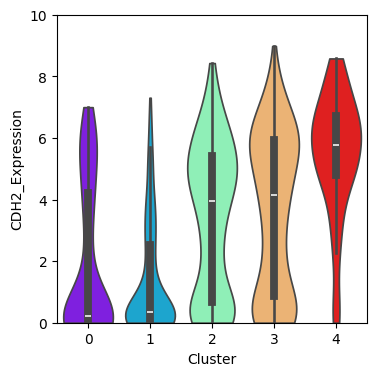

In [ ]:
#Fig. 2i
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap("rainbow", 5) 
custom_palette = [cmap(i) for i in range(5)]
custom_palette = [(cmap(i)[0], cmap(i)[1], cmap(i)[2], 0.5) for i in range(5)]
value = "CDH2_Expression"

plt.figure(figsize=(4, 4))
sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0) 
plt.ylim(0, 10)
plt.savefig("../result/figure.svg")
plt.show()

C:\Users\ki949\AppData\Local\Temp\ipykernel_43620\733816705.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", 5)
C:\Users\ki949\AppData\Local\Temp\ipykernel_43620\733816705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0)


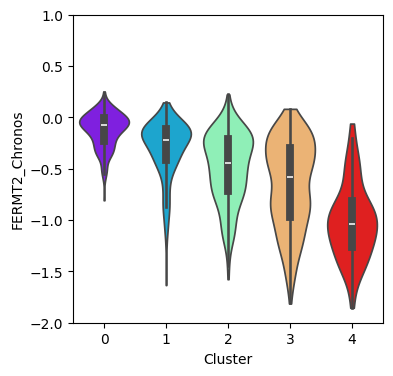

In [ ]:
#Fig. 3b, 3d, S5d
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap("rainbow", 5) 
custom_palette = [cmap(i) for i in range(5)]
custom_palette = [(cmap(i)[0], cmap(i)[1], cmap(i)[2], 0.5) for i in range(5)]
value = "FERMT2_Chronos"

plt.figure(figsize=(4, 4))
sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0) 
plt.ylim(-2, 1)
plt.savefig("../result/figure.svg")
plt.show()

In [ ]:
#FIg. S
model = pd.read_csv("../data/Model.csv", index_col=0)
cm = ch_ex.join(model, how='inner')#.dropna()
coa = cm[~cm.OncotreeLineage.isin(['Lymphoid', 'Myeloid'])]#.groupby('Cluster').mean()
#coa = cm[cm.OncotreeLineage.isin(['Breast'])]#.groupby('Cluster').mean()


#cm[['Cluster', 'SYP_Expression']].groupby('Cluster').mean()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap("rainbow", 5) 
custom_palette = [cmap(i) for i in range(5)]
custom_palette = [(cmap(i)[0], cmap(i)[1], cmap(i)[2], 0.5) for i in range(5)]
value = "CGA_Expression"

plt.figure(figsize=(4, 4))
sns.violinplot(data=coa, x="Cluster", y=value, palette = custom_palette, cut=0) 
plt.ylim(0, 12)
plt.savefig("../result/figure.svg")
plt.show()


NameError: name 'model' is not defined

In [ ]:
coa

,A1BG_Chronos,A1CF_Chronos,A2M_Chronos,A2ML1_Chronos,A3GALT2_Chronos,A4GALT_Chronos,A4GNT_Chronos,AAAS_Chronos,AACS_Chronos,AADAC_Chronos,...,CCLEName,HCMIID,PediatricModelType,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID,ModelIDAlias,Subtype_Category
ACH-000144,0.052993,-0.058592,-0.130730,0.035472,-0.240421,-0.007025,0.151645,0.188707,-0.002525,0.263033,...,RERFGC1B_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,285.0,SIDM00358,1240209.0,NaN,TNBC
ACH-000247,0.172091,0.159613,0.077926,0.128003,-0.205115,-0.047200,-0.058192,-0.323501,0.003612,0.223052,...,OCUM1_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,1712.0,SIDM00568,1298358.0,NaN,TNBC
ACH-000255,0.096294,0.000518,-0.092790,0.088354,-0.157715,-0.110492,-0.047448,-0.114106,0.072862,0.058061,...,LMSU_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,NaN,NaN,NaN,NaN,TNBC
ACH-000303,-0.039625,0.058949,0.092265,0.142847,-0.156417,0.041405,0.230236,-0.151161,-0.006731,-0.059623,...,SNU5_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,28.0,SIDM01144,908445.0,NaN,TNBC
ACH-000305,-0.016280,0.000132,0.024829,0.074751,-0.108132,-0.077407,0.084600,-0.158935,0.035954,0.113154,...,ECGI10_OESOPHAGUS,NaN,False,Approved for public sharing - CCLE,NaN,2138.0,SIDM00278,753555.0,NaN,TNBC
ACH-000318,-0.002196,-0.093890,0.067025,0.078931,-0.107228,-0.010239,0.072005,-0.278491,-0.056748,0.059945,...,TE10_OESOPHAGUS,NaN,False,Approved for public sharing - CCLE,NaN,1561.0,SIDM00349,753622.0,NaN,TNBC
ACH-000325,-0.012479,-0.170362,0.090511,0.106685,-0.092674,-0.068632,-0.231362,-0.025326,0.079047,0.134259,...,SNU620_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,NaN,NaN,NaN,NaN,TNBC
ACH-000344,0.014426,0.063095,-0.040164,-0.080119,0.084664,0.064396,-0.098892,-0.543283,-0.143306,0.108339,...,SNU668_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,NaN,NaN,NaN,NaN,TNBC
ACH-000356,0.103262,-0.216694,0.110847,0.044748,-0.023506,-0.025386,0.030776,-0.441549,0.026157,-0.065846,...,MKN45_STOMACH,NaN,False,Approved for public sharing - CCLE,NaN,1542.0,SIDM00247,925340.0,NaN,TNBC
ACH-000383,-0.126478,-0.036142,0.019128,0.040131,-0.076179,0.039535,0.021104,-0.149075,-0.074487,-0.042541,...,OE33_OESOPHAGUS,NaN,False,Approved for public sharing - CCLE,NaN,1554.0,SIDM00477,910549.0,NaN,TNBC


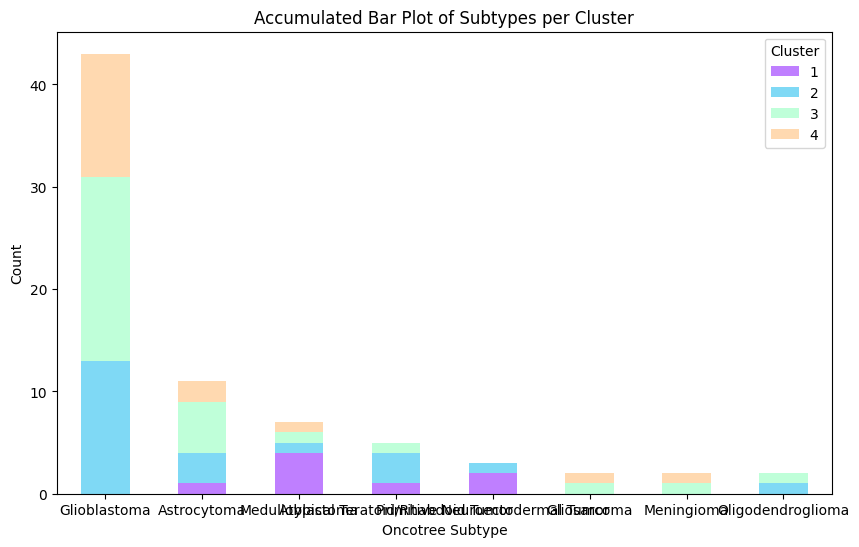

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

coa2 = coa[coa.OncotreeSubtype.isin(['Lung Adenocarcinoma', 'Small Cell Lung Cancer', 'Lung Squamous Cell Carcinoma', 'Large Cell Lung Carcinoma'])]
coa2 = cm[cm.OncotreeLineage.str.contains('CNS/Brain')]

# Create crosstab
crosstab_df = pd.crosstab(coa2['OncotreeSubtype'], coa2['Cluster'])

# Sort subtypes by total count
crosstab_df = crosstab_df.loc[crosstab_df.sum(axis=1).sort_values(ascending=False).index]

# Plot
ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_palette)

plt.title('Accumulated Bar Plot of Subtypes per Cluster')
plt.xlabel('Oncotree Subtype')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cluster')

plt.savefig('../result/stacked_bar_plot.svg', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data
coa2 = cm.copy()

# --- Step 1: sort by lineage and within lineage by subtype size ---
subtype_counts = coa2['OncotreeSubtype'].value_counts()
coa2['Subtype_Count'] = coa2['OncotreeSubtype'].map(subtype_counts)

# Sort by lineage (A→Z) and then by subtype count (descending)
coa2 = coa2.sort_values(['OncotreeLineage', 'Subtype_Count'], ascending=[True, False])

# Create combined label
coa2['Lineage_Subtype'] = coa2['OncotreeLineage'] + ' - ' + coa2['OncotreeSubtype']

# --- Step 2: create crosstab ---
crosstab_df = pd.crosstab(coa2['Lineage_Subtype'], coa2['Cluster'])

# --- Step 3: reorder rows properly within each lineage ---
ordered_labels = []
for lineage, group in coa2.groupby('OncotreeLineage', sort=True):
    subtypes = group[['OncotreeSubtype', 'Subtype_Count']].drop_duplicates()
    subtypes = subtypes.sort_values('Subtype_Count', ascending=False)
    for subtype in subtypes['OncotreeSubtype']:
        label = f'{lineage} - {subtype}'
        if label in crosstab_df.index:
            ordered_labels.append(label)
    ordered_labels.append(' ')  # spacer
    ordered_labels.append(' ')  # spacer


ordered_labels = [l for l in ordered_labels if l in crosstab_df.index or l == ' ']

# Build the final DataFrame with spacer rows
crosstab_with_spacers = pd.DataFrame(index=ordered_labels, columns=crosstab_df.columns)
for label in ordered_labels:
    if label != ' ':
        crosstab_with_spacers.loc[label] = crosstab_df.loc[label]
    else:
        crosstab_with_spacers.loc[label] = 0

# --- Step 4: plot ---
ax = crosstab_with_spacers.plot(
    kind='bar', stacked=True, figsize=(18, 8), cmap='rainbow',# color=custom_palette
)

plt.title('Accumulated Bar Plot of Subtypes per Cluster')
plt.xlabel('Cancer Type and Subtype')
plt.ylabel('Count')

# Rotate x-axis labels 90° (vertical)
plt.xticks(rotation=90)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('../result/stacked_bar_plot_all_cancers_sorted_spacers.svg', bbox_inches='tight')
plt.show()


In [289]:
for l in sorted(set(cm['OncotreeLineage'])):
    print(l)

Ampulla of Vater
Biliary Tract
Bladder/Urinary Tract
Bone
Bowel
Breast
CNS/Brain
Cervix
Esophagus/Stomach
Eye
Fibroblast
Head and Neck
Kidney
Liver
Lung
Lymphoid
Myeloid
Ovary/Fallopian Tube
Pancreas
Peripheral Nervous System
Pleura
Prostate
Skin
Soft Tissue
Testis
Thyroid
Uterus
Vulva/Vagina


In [ ]:
lin = ''
las = 'a'
for g in crosstab_with_spacers.index:
    lilo = g.split('- ')[0].strip()
    if lilo != lin:
        lin = lilo
        print(lilo)
    p = '- '.join(g.split('- ')[1:])
    if p== las:
        continue
    las = p
    print(p)

Ampulla of Vater
Ampullary Carcinoma


Biliary Tract
Intrahepatic Cholangiocarcinoma
Extrahepatic Cholangiocarcinoma
Gallbladder Adenocarcinoma, NOS
Gallbladder Cancer
Cholangiocarcinoma


Bladder/Urinary Tract
Bladder Urothelial Carcinoma
Bladder Squamous Cell Carcinoma
Urethral Urothelial Carcinoma


Bone
Ewing Sarcoma
Osteosarcoma
Dedifferentiated Chondrosarcoma


Bowel
Colon Adenocarcinoma
Rectal Adenocarcinoma
Mucinous Adenocarcinoma of the Colon and Rectum


Breast
Breast Invasive Ductal Carcinoma
Invasive Breast Carcinoma
Breast Invasive Carcinoma, NOS
Breast Ductal Carcinoma In Situ
Breast Invasive Lobular Carcinoma
Breast Neoplasm, NOS


CNS/Brain
Glioblastoma
Astrocytoma
Medulloblastoma
Atypical Teratoid/Rhabdoid Tumor
Primitive Neuroectodermal Tumor
Meningioma
Oligodendroglioma
Gliosarcoma


Cervix
Cervical Squamous Cell Carcinoma
Cervical Adenocarcinoma
Mixed Cervical Carcinoma
Endocervical Adenocarcinoma
Glassy Cell Carcinoma of the Cervix


Esophagus/Stomach
Esophageal Sq

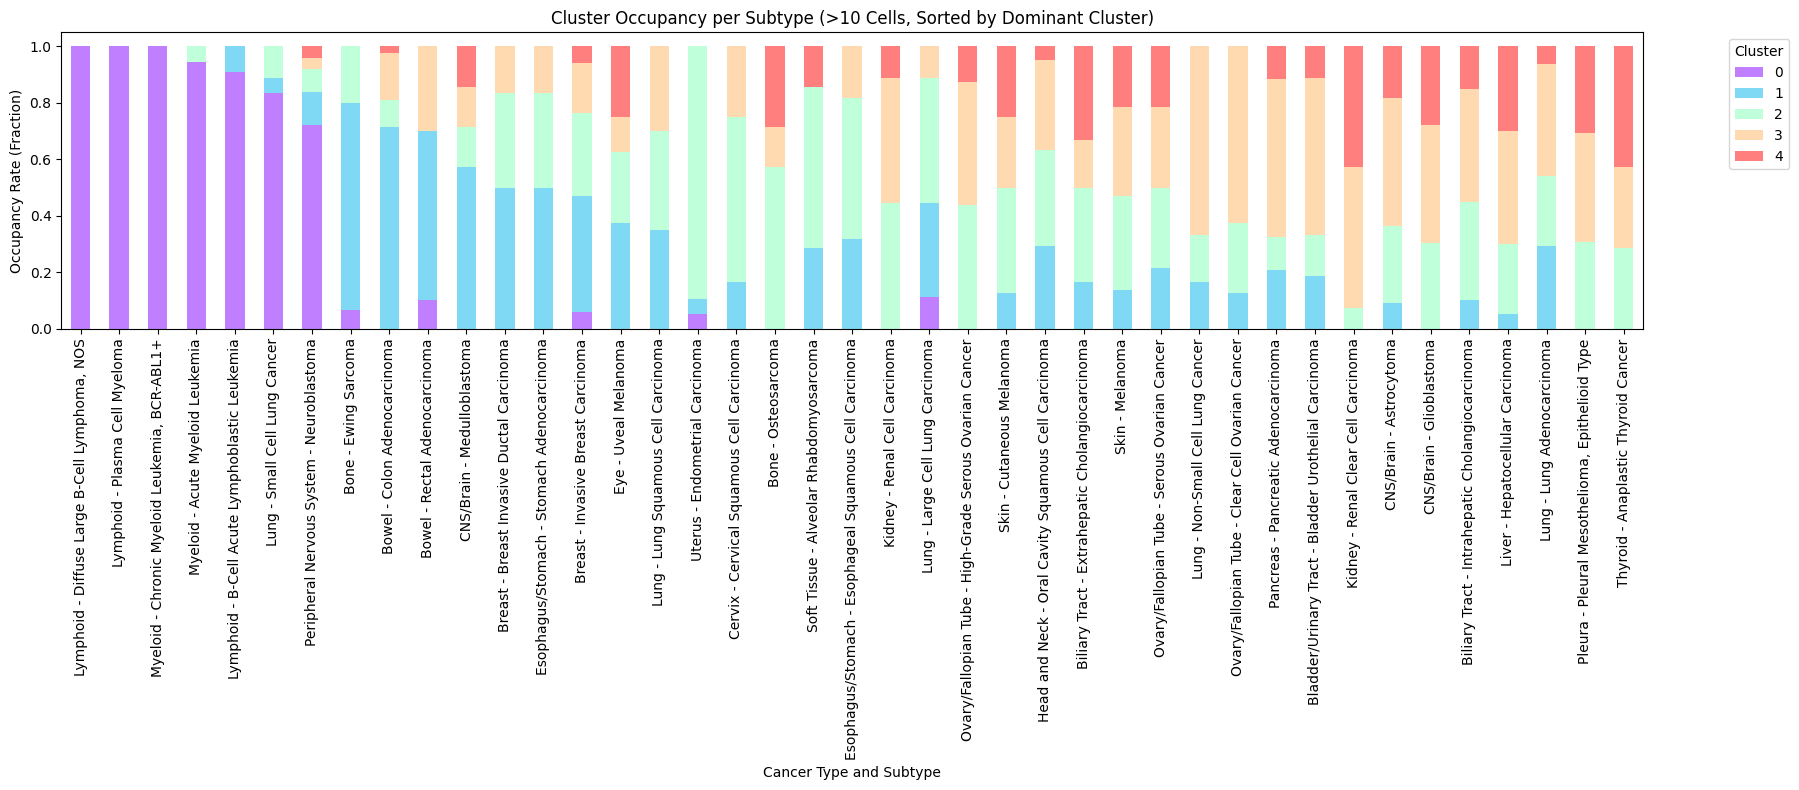

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data
coa2 = cm.copy()

# --- Step 1: count cell lines per subtype ---
subtype_counts = coa2['OncotreeSubtype'].value_counts()
coa2['Subtype_Count'] = coa2['OncotreeSubtype'].map(subtype_counts)

# Filter subtypes with >10 cell lines
coa2 = coa2[coa2['Subtype_Count'] > 5]

# Create combined label
coa2['Lineage_Subtype'] = coa2['OncotreeLineage'] + ' - ' + coa2['OncotreeSubtype']

# --- Step 2: Crosstab (counts) ---
crosstab_df = pd.crosstab(coa2['Lineage_Subtype'], coa2['Cluster'])

# --- Step 3: Normalize to get occupancy (row-wise) ---
occupancy_df = crosstab_df.div(crosstab_df.sum(axis=1), axis=0)

# --- Step 4: Find dominant cluster + max occupancy ---
dominant_cluster = occupancy_df.idxmax(axis=1)
max_occupancy = occupancy_df.max(axis=1)

# Combine into a DataFrame for sorting
sort_df = pd.DataFrame({
    'DominantCluster': dominant_cluster.astype(str),  # ensure sortable as strings
    'MaxOccupancy': max_occupancy
})

# Sort by cluster (1 → 5) and then by occupancy descending
sort_df['DominantCluster'] = sort_df['DominantCluster'].astype(int)
sort_df = sort_df.sort_values(['DominantCluster', 'MaxOccupancy'], ascending=[True, False])

# Reorder the occupancy_df accordingly
occupancy_df = occupancy_df.loc[sort_df.index]

# --- Step 5: Plot ---
ax = occupancy_df.plot(
    kind='bar', stacked=True, figsize=(18, 8), color=custom_palette
)

plt.title('Cluster Occupancy per Subtype (>10 Cells, Sorted by Dominant Cluster)')
plt.xlabel('Cancer Type and Subtype')
plt.ylabel('Occupancy Rate (Fraction)')
plt.xticks(rotation=90)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('../result/stacked_bar_occupancy_by_dominant_cluster.svg', bbox_inches='tight')
plt.show()


In [ ]:
crosstab_df

Cluster,0,1,2,3,4
Lineage_Subtype,,,,,
Ampulla of Vater - Ampullary Carcinoma,0,0,2,2,1
Biliary Tract - Cholangiocarcinoma,0,0,0,1,0
Biliary Tract - Extrahepatic Cholangiocarcinoma,0,1,2,1,2
"Biliary Tract - Gallbladder Adenocarcinoma, NOS",0,0,1,3,0
Biliary Tract - Gallbladder Cancer,0,0,2,0,0
...,...,...,...,...,...
Uterus - Uterine Adenosquamous Carcinoma,0,0,1,2,0
Uterus - Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,0,0,1,2,1
Uterus - Uterine Clear Cell Carcinoma,0,0,0,1,0


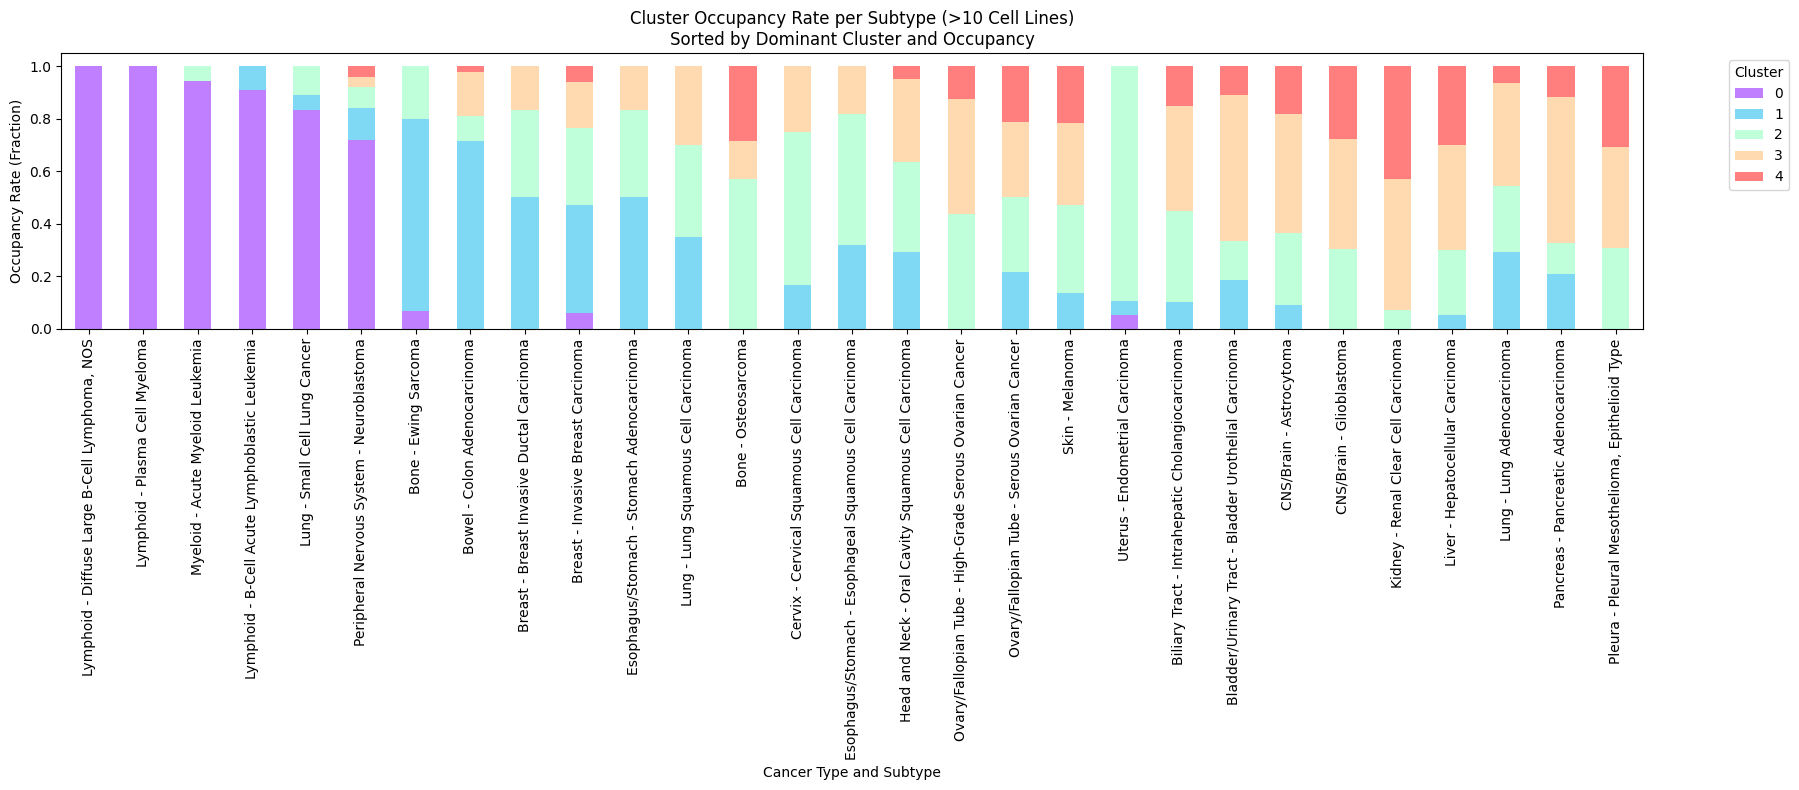

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data
coa2 = cm.copy()

# --- Step 1: count and filter ---
subtype_counts = coa2['OncotreeSubtype'].value_counts()
coa2['Subtype_Count'] = coa2['OncotreeSubtype'].map(subtype_counts)
coa2 = coa2[coa2['Subtype_Count'] > 10]  # keep only subtypes with >10 cell lines

# Combined label
coa2['Lineage_Subtype'] = coa2['OncotreeLineage'] + ' - ' + coa2['OncotreeSubtype']

# --- Step 2: crosstab and normalize (occupancy) ---
crosstab_df = pd.crosstab(coa2['Lineage_Subtype'], coa2['Cluster'])
occupancy_df = crosstab_df.div(crosstab_df.sum(axis=1), axis=0)

# --- Step 3: find dominant cluster and max occupancy ---
occupancy_df['MaxCluster'] = occupancy_df.idxmax(axis=1)
occupancy_df['MaxOccupancy'] = occupancy_df.max(axis=1)

# --- Step 4: define cluster order (1→5) and sort ---
# Ensure consistent sorting by numeric order of cluster names
cluster_order = sorted(coa2['Cluster'].unique(), key=lambda x: int(str(x)))
occupancy_df['ClusterOrder'] = occupancy_df['MaxCluster'].map(lambda x: cluster_order.index(int(x)) if int(x) in cluster_order else 999)

occupancy_df = occupancy_df.sort_values(['ClusterOrder', 'MaxOccupancy'], ascending=[True, False])

# --- Step 5: drop helper columns for plotting ---
plot_df = occupancy_df.drop(columns=['MaxCluster', 'MaxOccupancy', 'ClusterOrder'])

# --- Step 6: plot ---
ax = plot_df.plot(
    kind='bar', stacked=True, figsize=(18, 8), color=custom_palette
)

plt.title('Cluster Occupancy Rate per Subtype (>10 Cell Lines)\nSorted by Dominant Cluster and Occupancy')
plt.xlabel('Cancer Type and Subtype')
plt.ylabel('Occupancy Rate (Fraction)')
plt.xticks(rotation=90)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('../result/stacked_bar_plot_occupancy_by_cluster.svg', bbox_inches='tight')
plt.show()


cm.groupby

In [ ]:
cm.groupby('OncotreeLineage').size().sort_values(ascending=False)[:20]

OncotreeLineage
Lung                         111
Lymphoid                      78
CNS/Brain                     75
Skin                          69
Esophagus/Stomach             57
Head and Neck                 54
Bowel                         54
Ovary/Fallopian Tube          54
Pancreas                      45
Breast                        44
Soft Tissue                   37
Myeloid                       35
Uterus                        33
Biliary Tract                 33
Bladder/Urinary Tract         31
Kidney                        31
Bone                          30
Peripheral Nervous System     29
Liver                         23
Pleura                        19
dtype: int64

In [ ]:
cm = ch_ex.join(model, how='inner')#.dropna()
coa = cm#[cm.OncotreeLineage.isin(['Esophagus/Stomach'])].copy()
coa['Subtype_Category'] = np.where(coa['ModelSubtypeFeatures'].str.contains('TNBC'), 'TNBC', 'non-TNBC')#.groupby('Cluster').mean()
pd.DataFrame(coa[['Cluster','OncotreeSubtype']].groupby(['OncotreeSubtype','Cluster']).size())

conditions = [
    coa['OncotreeSubtype'].str.contains('Squamous'),
    coa['OncotreeSubtype'].str.contains('Adenocarcinoma')
]
choices = ['Squamous','Adenocarcinoma']
#coa['Subtype_Category'] = np.select(conditions, choices, default='Other')

pd.DataFrame(coa[['Cluster','Subtype_Category']].groupby(['Subtype_Category','Cluster']).size())
#pd.DataFrame(coa[['Cluster','OncotreeSubtype']].groupby(['OncotreeSubtype','Cluster']).size())



0
Subtype_Category Cluster    
TNBC             1        26
                 2        19
                 3        11
                 4         1

In [ ]:
coa

,A1BG_Chronos,A1CF_Chronos,A2M_Chronos,A2ML1_Chronos,A3GALT2_Chronos,A4GALT_Chronos,A4GNT_Chronos,AAAS_Chronos,AACS_Chronos,AADAC_Chronos,...,PublicComments,CCLEName,HCMIID,PediatricModelType,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID,ModelIDAlias
ACH-000022,-0.061603,0.039072,0.114477,-0.077290,-0.115947,-0.035359,-0.007086,-0.097447,-0.024636,0.001219,...,NaN,PATU8988S_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,NaN,SIDM00452,NaN,NaN
ACH-000023,-0.084098,-0.126626,-0.023417,-0.060237,-0.071407,0.012464,0.051898,-0.243829,-0.001805,0.109179,...,NaN,PATU8988T_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,1242.0,SIDM00453,1240201.0,NaN
ACH-000042,0.026085,-0.043415,0.079757,0.078924,-0.058882,-0.090866,-0.002343,-0.223971,-0.009727,0.087630,...,NaN,PANC0203_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,1838.0,SIDM01139,1298475.0,NaN
ACH-000060,0.007833,0.025309,-0.038953,0.015686,-0.364103,-0.103090,-0.016307,-0.109352,-0.003043,0.078244,...,NaN,PANC1005_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,197.0,SIDM01135,925348.0,NaN
ACH-000085,0.029816,0.016192,0.090188,0.121661,-0.266451,-0.546893,-0.046924,-0.166753,0.222606,0.095628,...,NaN,T3M4_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,NaN,NaN,NaN,NaN
ACH-000093,-0.106349,0.044556,-0.152234,-0.251108,0.319974,-0.206109,0.113950,-0.023294,-0.013396,0.056376,...,NaN,PANC0504_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,NaN,NaN,NaN,NaN
ACH-000094,0.027597,0.088936,0.127308,0.121237,-0.014139,0.002681,0.013079,-0.133590,0.059527,0.146635,...,NaN,HPAFII_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,889.0,SIDM00669,724869.0,NaN
ACH-000108,-0.125546,-0.049111,0.089276,0.041318,-0.059385,-0.031541,-0.054961,-0.324108,-0.010187,0.025562,...,NaN,KP3_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,155.0,SIDM00571,1298219.0,NaN
ACH-000114,-0.069196,-0.159033,-0.028556,0.085543,0.006735,-0.050117,0.061335,-0.366456,0.005281,0.076933,...,NaN,SU8686_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,268.0,SIDM01188,1240218.0,NaN
ACH-000118,0.017323,-0.032843,-0.030916,0.029508,0.026323,-0.080925,0.016685,-0.283169,0.036194,0.058565,...,NaN,HUPT3_PANCREAS,NaN,False,Approved for public sharing - CCLE,NaN,109.0,SIDM00533,907285.0,NaN


### GO enrichment

In [ ]:
len(high_exp)

553

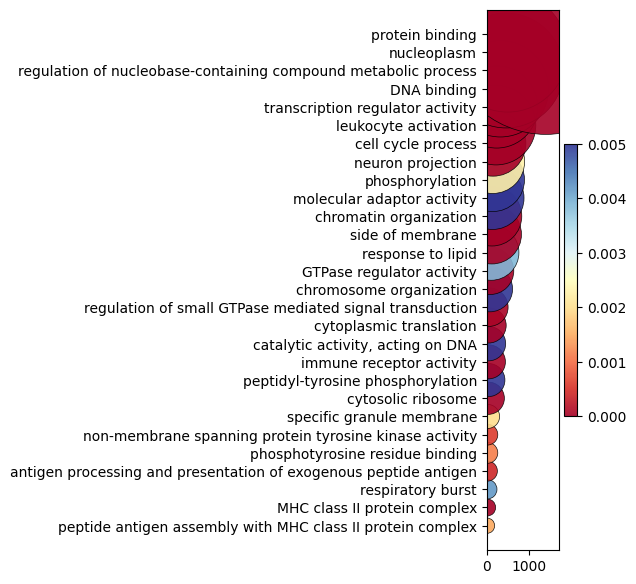

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
q = [g.split('_')[0] for g in ch_results]
q = [g.split('_')[0] for g in high_exp]

high_exp = [r for r in results_ex[0] if 'Expression' in r]
q = [g.split('_')[0] for g in high_exp]

response = requests.post(
        url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
        json={
            'organism': 'hsapiens',
            'query': q,
            'sources': ['GO'],  # Only search Gene Ontology
            'user_threshold': 0.01,
            'significance_threshold_method': 'g_SCS',
            "highlight": True
        },
        headers={'User-Agent': 'PythonRequest'}
    )
results = response.json().get("result", [])
gost_df = pd.DataFrame(results)
enrich_df = gost_df[(gost_df["highlighted"])].nlargest(30, "intersection_size")
enrich_df = enrich_df.sort_values("intersection_size")
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(
        x=enrich_df["intersection_size"],
        y=enrich_df["name"],
        s=enrich_df["intersection_size"] * 15,  # Scale size for visibility
        c=enrich_df["p_value"],
        cmap="RdYlBu",
        alpha=0.9,
        edgecolor="k",
        linewidth=0.5,
        vmax=0.005
    )

plt.xlim(0,len(q))
cbar = fig.colorbar(scatter)
plt.tight_layout()
plt.savefig("../result/figure.svg")
plt.show()

In [ ]:
enrich_df[enrich_df['name'].str.contains('leu')]

,description,effective_domain_size,goshv,highlighted,intersection_size,intersections,name,native,p_value,parents,precision,query,query_size,recall,significant,source,term_size,source_order,group_id
0,"""A change in morphology and behavior of a leuk...",21026,21348,True,219,"[[IMP], [], [IEA], [], [], [], [], [IDA, ISS, ...",leukocyte activation,GO:0045321,5.775979e-51,"[GO:0001775, GO:0002376]",0.144079,query_1,1520,0.223469,True,GO:BP,980,11194,13


In [ ]:
high_exp = [r for r in results_ex[1] if 'Expression' in r]
q = [g.split('_')[0] for g in high_exp]
for qq in q: 
    print(qq)

IQANK1
HSD11B2
C9ORF152
CKMT1A
FXYD3
RBBP8NL
OVOL1
CKMT1B
S100A14
GRTP1
GPX2
RAB25
ARHGEF16
MLXIPL
MARVELD3
ESRP1
S100P
BICDL2
ATP2C2
ARHGAP8
PRR15L
KDF1
C1ORF210
ERBB3
ELMO3
EPN3
MYH14
TJP3
TC2N
ABO
CBLC
CAMSAP3
TMEM125
LAD1
GRHL2
IL17RE
TMEM45B
CAPN8
PRR5-ARHGAP8
RNF43
IL20RA
PRSS8
OVOL2
KRTCAP3
CDS1
PLEKHG6
TRIM31
PLA2G4F
FUT2
PHGR1
TMPRSS4
ESRP2
TMPRSS2
CATSPERB
CDH1
IRF6
CLDN7
PTK6
EPCAM
ASCL2
STARD10
FAM83E
SULT2B1
TNS4
TMC4
LLGL2
EPHA1
ANKRD22
GGT6
AGR3
POF1B
CDX2
TMEM30B
TMC5
FUT3
NRARP
RAPGEFL1
EXPH5
IGSF9
AGR2
FAAH
CDC42BPG
MAP7
FAM83H
NECTIN4
ARHGEF38
TMPRSS13
BSPRY
CEACAM5
LGALS4
SLC29A2
MPZL2
ENTPD2
PLEKHH1
TMEM52
SPINT1
EVPL
PRR15
GRHL1
CLRN3
FA2H
MARVELD2
LARGE2
C11ORF52
FAM83B
HDHD3
SMIM22
SLC7A8
CRB3
SLC52A3
DEGS2
CNKSR1
IYD
FAM83F
PRSS22
HOOK1
PRSS16
ST14
CMTM4
MPP7
EPPK1
C10ORF95
YBX2
MUC3A
MAPK15
ABHD17C
BCL2L14
MAL2
PRRG2
RNF223
ALDH3B2


In [ ]:
genes = 'IKZF1,WAS,SPN,RASAL3,BTK,CORO1A,SPI1,SASH3,TNFAIP8L2,CD48,PTPRC,PAX5,PIK3CG,ITGAL,NCKAP1L,MYB,BCL2,WDFY4,STAP1,NLRC3,TBC1D10C,MFNG,TESPA1,MZB1,RHOH,LYL1,INPP5D,IL2RG,POU2AF1,CD84,CD79B,SAMSN1,LAPTM5,LCP2,CD38,TLR9,IKZF3,LY9,CD69,DOCK8,LAX1,RASSF5,IL12RB1,CEACAM21,AIF1,CD79A,PRKCB,FGR,LST1,TNFRSF13C,TREML2,SLAMF6,POU2F2,LAT2,JAK3,SIT1,GPR18,CD300A,CD19,DTX1,DOCK2,CSK,CD86,CNR2,IL21R,LILRA2,PLCG2,FCHO1,FCGR2B,TMEM131L,PTPN22,VAV1,NKG7,CD27,SELPLG,APBB1IP,GAPT,PLCL2,CD80,PTK2B,FCER2,CD244,CD180,NCR3,MS4A1,TNFRSF13B,TYROBP,IRF8,LCP1,TOP2B,IRF4,SLAMF1,ACTL6B,SHLD1,JAML,CD247,TCF3,ZAP70,LILRB4,CD4,NFATC3,CCDC88B,DOCK11,CCL3,FUT7,CD33,RIPOR2,ADORA2A,RAB44,FCRL5,ITGA4,MEF2C,FES,STAT5B,PRAM1,CHRNB2,TYK2,TSHR,TSPAN32,HLA-DOA,DCAF15,DHPS,CCR7,CD300LF,NTRK1,DCAF12,TTBK1,NFAM1,TMIGD2,CD28,SMARCA4,AGER,CTSG,SEMA4A,MNDA,SLA2,FCRL1,CR1,PTPN6,ATAD5,FLT3,CRACR2A,SYK,HLA-DOB,GPR183,CHGA,STAT5A,LILRB2,HLA-DRA,CCR2,SLC18A2,BLNK,PIK3R6,ARID2,ARID1A,HLA-DPA1,CD226,CHD7,TNFSF8,RPS6,TNF,EZH2,HLA-DPB1,FCRL3,CR2,AICDA,PATZ1,KMT5C,HLA-DRB5,SPTA1,ITGB2,GATA1,CLNK,AZU1,LYN,IRGM,CD3E,CD93,RAC2,RASGRP1,ARID1B,PELI1,CX3CR1,RUNX3,FCER1A,CLEC4A,RAG2,FCER1G,KLRK1,CD1C,LCK,CPLX2,GRB2,PRF1,PHF10,CD3D,HDAC5,AKIRIN2,ZC3H8,CD74,BRAF,SMARCC1,HLA-DRB1,ITM2A,LGALS12,TNFSF13B,DUSP22,PKN1,PPP2R3C,ITGAM,CXCR2,CASP3,RPL22,IL18RAP,BATF,TIGIT,HLA-DQB2,SMARCD2,FANCA'.split(',')
genes = 'SH2D3C,CORO1A,AGAP2,RASGRP2,KIF21B,SEPTIN6,NCF1,KCNA3,TSPOAP1,CYBB,PRKCB,DDN,ARHGAP4,RAB39B,KCNAB2,ATP1A3,CNR2,FCGR2B,PKHD1L1,CYFIP2,PTK2B,IQCB1,CPNE5,AGTPBP1,MYCBP2,FCHSD2,EPM2A,LAMP5,ERMN,ADAM22,ABI3,NSG2,RIPOR2,ADORA2A,ITGA4,NRSN1,PSD,BSN,CHRNB2,HRH3,KCNN3,ELAVL4,NTRK1,SEZ6,ACADM,CLASP2,CPEB3,ZNF804A,KCNC1,ARHGAP33,JPH4,GNG3,CTNNA2,CCR2,MAST1,TPH1,SLC18A2,ADORA3,STMN4,SYT4,ATF4,BPTF,RPS6,UNC13C,MACO1,SSTR3,SYNGAP1,CNTN2,DCX,CHRNA3,SYP,GABRR2,DYRK1A,NRXN1,ARHGEF7,CRHR2,TBCC,SPTA1,SSTR2,KCNJ11,KCNIP2,ATCAY,ATP2B3,PDE6B,PNOC,GRIPAP1,CD3E,PTGDR2,STMN1,UNC80,MADD,CX3CR1,CPLX3,PACSIN1,KCNA6,CHRNB4,RAB3A,TBC1D24,CPLX2,HTR3A,CACNG2,UPF3A,GHRL,SYN1,RGS8,GCH1,RIC3,MICAL1,OPRL1,SLC8A3,BRAF,SKOR1,CERKL,SHISA7,KCNB2,KATNB1,MAX,LHFPL5,BLOC1S5,SPTBN4,CAMKK2,SRSF10,TERF2,CDK5R2,KIF5A,CCDC66,DTNBP1,GABRB2,EIF4EBP2,GRK4,POU4F1,INSR,RUFY3,APBA3,HRH2,N4BP3,DCC,GRIK3,AGBL4,TRPV2,PDE6G'.split(',')
genes = 'OVOL1,RAB25,ESRP1,ATP2C2,KDF1,TJP3,CAMSAP3,GRHL2,OVOL2,ESRP2,IRF6,PTK6,EPCAM,SULT2B1,POF1B,CDX2,NRARP,EXPH5,AGR2,SPINT1,EVPL,GRHL1,FA2H,MARVELD2,ST14,EPPK1'.split(',')
for gene in genes:
    print(gene)

OVOL1
RAB25
ESRP1
ATP2C2
KDF1
TJP3
CAMSAP3
GRHL2
OVOL2
ESRP2
IRF6
PTK6
EPCAM
SULT2B1
POF1B
CDX2
NRARP
EXPH5
AGR2
SPINT1
EVPL
GRHL1
FA2H
MARVELD2
ST14
EPPK1


In [ ]:
for g in reversed(list(enrich_df["name"])):
    print(g)

cytosol
enzyme binding
cell motility
anatomical structure morphogenesis
intracellular signaling cassette
actin cytoskeleton organization
focal adhesion
cell population proliferation
extracellular exosome
actin cytoskeleton
cell-substrate adhesion
cell leading edge
regulation of cellular localization
response to peptide
response to wounding
integrin-mediated signaling pathway


In [ ]:
a = 'ITGA5,ITGA11,NRP1,RRAS,TGFB1I1,ITGB1,CDH2,TNS2,DAB2,CD151,NEXN,FAP,TSPAN4,PARVA,ANXA5,ITGA1,ILK,ARHGAP22,FLNA,CDH13,LRP1,MMP14,AFAP1,VIM,ITGB5,CAV1,PLAUR,MRC2,TPM4,DLC1,ITGA3,TNC,FZD2,ADAM9,PDLIM7,ITGAV,CNN3,ZYX,RND3,VCL,CAPN2,BCAR3,FERMT2,FHL2,MYH9,ACTN1,FLNC,CD99L2,ANXA1,ARHGAP31,DDR2,LAYN,SHC1,RSU1,PDGFRB,FHL1,GNA12,TLN1,GJA1,ARHGAP24,CORO2B,CSPG4,CD44,CDC42EP1,RRAS2'
for g in a.split(','):
    print(g)

ITGA5
ITGA11
NRP1
RRAS
TGFB1I1
ITGB1
CDH2
TNS2
DAB2
CD151
NEXN
FAP
TSPAN4
PARVA
ANXA5
ITGA1
ILK
ARHGAP22
FLNA
CDH13
LRP1
MMP14
AFAP1
VIM
ITGB5
CAV1
PLAUR
MRC2
TPM4
DLC1
ITGA3
TNC
FZD2
ADAM9
PDLIM7
ITGAV
CNN3
ZYX
RND3
VCL
CAPN2
BCAR3
FERMT2
FHL2
MYH9
ACTN1
FLNC
CD99L2
ANXA1
ARHGAP31
DDR2
LAYN
SHC1
RSU1
PDGFRB
FHL1
GNA12
TLN1
GJA1
ARHGAP24
CORO2B
CSPG4
CD44
CDC42EP1
RRAS2


C:\Users\ki949\AppData\Local\Temp\ipykernel_1720\3415237305.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


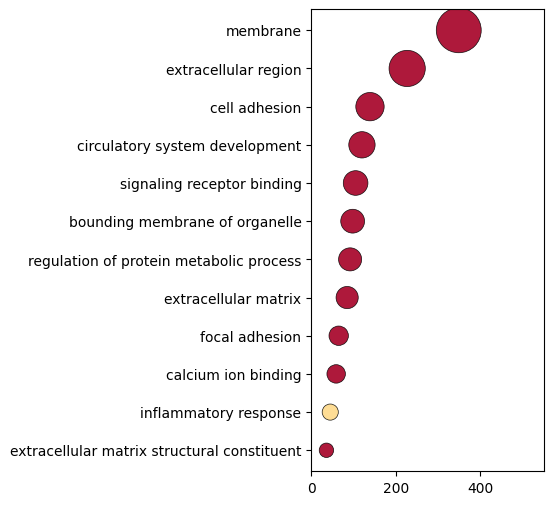

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))

scatter = ax.scatter(
        x=enrich_df["intersection_size"],
        y=enrich_df["name"],
        s=enrich_df["intersection_size"] * 3,  # Scale size for visibility
        c=enrich_df["p_value"],
        cmap="RdYlBu",
        alpha=0.9,
        edgecolor="k",
        linewidth=0.5,
        vmax=0.005
    )

plt.xlim(0,550)
plt.tight_layout()
plt.savefig("../result/figure.svg")
plt.show()

### RNA seq

In [ ]:
import pandas as pd
rnaseq = pd.read_csv("../data/RNAseq.csv")
deg = pd.read_csv("../data/RNAseq_edger_results.csv")
import numpy as np
deg["-log10(FDR)"] = -np.log10(deg["FDR"])
df_up = deg[(deg["logFC"]>2) & (deg["-log10(FDR)"]>2)]
df_down = deg[(deg["logFC"]<-2) & (deg["-log10(FDR)"]>2)]

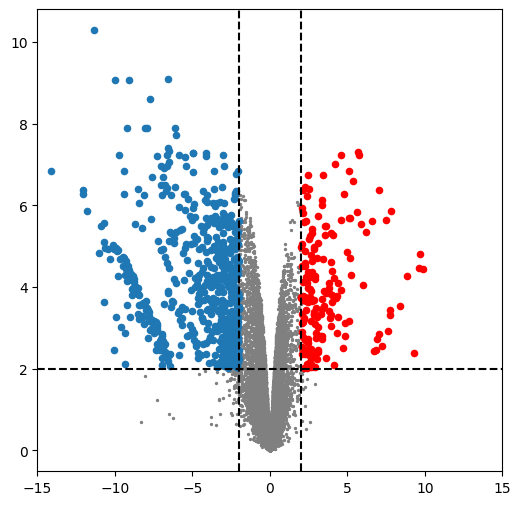

In [ ]:
#Fig. 5d
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.xlim((-15,15))
plt.scatter(deg["logFC"],deg["-log10(FDR)"],s=2,c="gray")
plt.scatter(df_up["logFC"],df_up["-log10(FDR)"],s=20,c="red")
plt.scatter(df_down["logFC"],df_down["-log10(FDR)"],s=20)
plt.axvline(2,color="black",linestyle="dashed")
plt.axhline(2,color="black",linestyle="dashed")
plt.axvline(-2,color="black",linestyle="dashed")
plt.show()

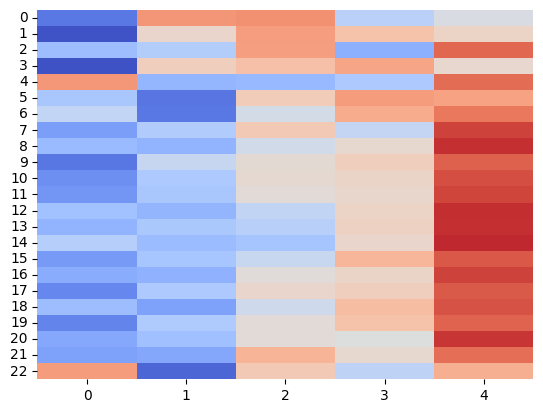

In [ ]:
#Fig. 5e, S7b
#Downregulated, cell-cell adhesion via plasma-membrane adhesion molecules
genes_down ="""AMIGO1
CADM4
CDH10
CLDN1
CLSTN2
ICAM1
MMP24
PCDHA6
PCDHB10
PCDHB13
PCDHB14
PCDHB16
PCDHB9
PCDHGA1
PCDHGA11
PCDHGA2
PCDHGA9
PCDHGB1
PCDHGB2
PCDHGB5
PCDHGB7
SCARF2
TRO""".strip().split()

#Upregulated, antigen processing and presentation of exogenous peptide antigen via MHC class II
genes_up="""CD74
CTSS
HLA-DMB
HLA-DPA1
HLA-DPB1
HLA-DRA
HLA-DRB1
HLA-DRB5""".strip().split()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
a = ch_ex.groupby("Cluster").mean()[[g+"_Expression" for g in genes_down]]
a = pd.DataFrame(StandardScaler().fit_transform(a)).T

sns.heatmap(a, cmap="coolwarm", vmin=-2,vmax=2,cbar=False)
plt.show()


In [ ]:
len(df_down)

571

In [ ]:
df_up = deg[(deg["logFC"]>2) & (deg["-log10(FDR)"]>2)]
df_down = deg[(deg["logFC"]<-2) & (deg["-log10(FDR)"]>2)]

upgenes = df_up.gene_symbol
downgenes = df_down.gene_symbol

a = ch_exg.loc[[str(u)+'_Expression' for u in upgenes if str(u)+'_Expression' in ch_exg.index]]
b = ch_exg.loc[[str(u)+'_Expression' for u in downgenes if str(u)+'_Expression' in ch_exg.index]]
a = a.sort_values(by=4, ascending=False)
b = b.sort_values(by=4, ascending=False)
#sns.heatmap(a, cmap="coolwarm", vmin=-1,vmax=1,cbar=False)
sns.heatmap(b, cmap="coolwarm", vmin=-1,vmax=1,cbar=False)

plt.show()

NameError: name 'ch_exg' is not defined

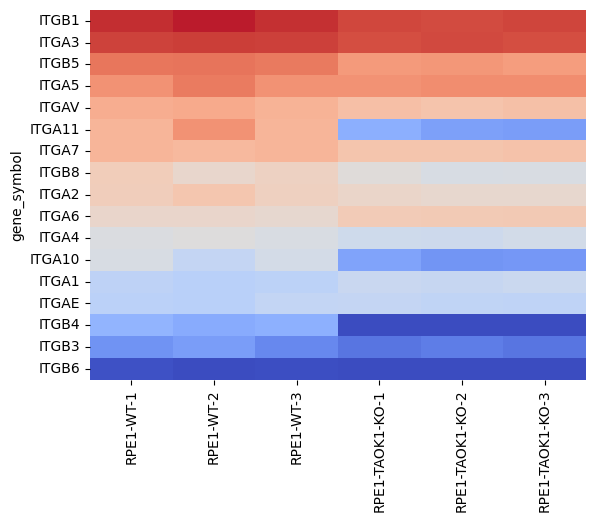

In [ ]:
import seaborn as sns
rnaseq =rnaseq.dropna(subset=["gene_symbol"])
integrin = rnaseq[rnaseq.gene_symbol.isin(['ITGA1','ITGA2','ITGA3','ITGA4','ITGA5','ITGA6','ITGA7','ITGA8','ITGA9','ITGA10', 'ITGA11','ITGAD','ITGAE','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4','ITGB5','ITGB6','ITGB7','ITGB8'])]
integrin.drop(columns=["ensembl_gene_id"], inplace=True)
sns.heatmap(integrin.set_index("gene_symbol"), cmap="coolwarm", vmin=0, vmax=12, cbar=False)
plt.savefig("../result/figure.svg")

In [ ]:
ch_ex2 = ch_ex.copy()
ch_ex2['Cluster'] = [ch_ex2['Cluster']==4]
#statistical test
import

KeyError: 'cluster'

In [ ]:

prism = pd.read_csv("../data/PRISM.csv", index_col=0)
#prism.index = [id_to_name.get(i,'') for i in prism.index]

In [ ]:
data = ch_ex.join(prism,how='left')

In [ ]:
from scipy.stats import mannwhitneyu
#ttest
from scipy.stats import ttest_ind
gene = 'CILENGITIDE_PRISM'
g1 = data[data['Cluster']==4][gene].dropna()
g2 = data[data['Cluster']!=4][gene].dropna()
stat, pval = ttest_ind(g1, g2, equal_var=False)
print(stat,pval)
mannwhitneyu(g1, g2, alternative='two-sided')

-2.56414900470948 0.012888853726270574


MannwhitneyuResult(statistic=7307.0, pvalue=0.011742941067399247)

In [ ]:

def pipeline_test(x, y, n_resamples=10000):
    """
    WT vs KO の2群データに対して:
    1. Shapiro → 2. Levene → 3. t-test / permutation
    """
    # Shapiro–Wilk
    _, p_shapiro_x = shapiro(x)
    _, p_shapiro_y = shapiro(y)

    if p_shapiro_x > 0.05 and p_shapiro_y > 0.05:
        # 正規性あり
        _, p_levene = levene(x, y)
        if p_levene > 0.05:
            # Student's t-test
            stat, pval = ttest_ind(x, y, equal_var=True)
            method = "Student t-test"
        else:
            # Welch's t-test
            stat, pval = ttest_ind(x, y, equal_var=False)
            method = "Welch t-test"
    else:
        # 正規性なし → permutation
        def stat_func(a, b):
            return np.mean(a) - np.mean(b)
        res = permutation_test((x, y), statistic=stat_func,
                               n_resamples=n_resamples,
                               alternative='two-sided',
                               random_state=0)
        stat, pval = res.statistic_obs, res.pvalue
        method = "Permutation test"
    print(f"  Method: {method}, stat={stat:.4f}, p={pval} | Shapiro p(x)={p_shapiro_x:.3f}, p(y)={p_shapiro_y:.3f}")
    return method, stat, pval, p_shapiro_x, p_shapiro_y
    

In [ ]:
pipeline_test(auc_siNC, auc_siITGAV)

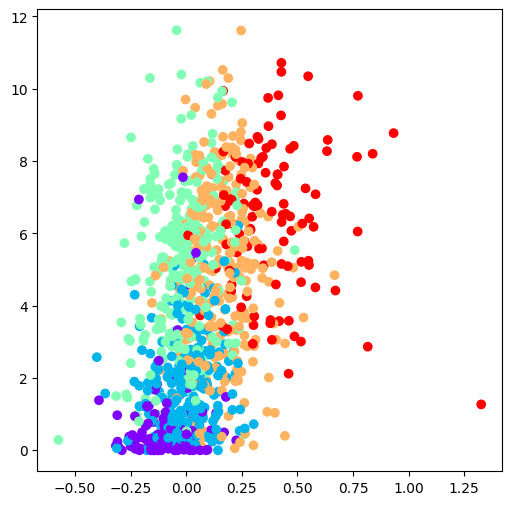

In [ ]:
plt.figure(figsize=(6,6))
#plt.scatter(ch_ex['IKBIP_Expression'],ch_ex['ITGAV_Chronos'], c=ch_ex['Cluster'], cmap='rainbow')
plt.scatter(ch_ex['TAOK1_Chronos'],ch_ex['CCN2_Expression'], c=ch_ex['Cluster'], cmap='rainbow')

In [408]:
cm

,A1BG_Chronos,A1CF_Chronos,A2M_Chronos,A2ML1_Chronos,A3GALT2_Chronos,A4GALT_Chronos,A4GNT_Chronos,AAAS_Chronos,AACS_Chronos,AADAC_Chronos,...,PublicComments,CCLEName,HCMIID,PediatricModelType,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID,ModelIDAlias
ACH-000001,-0.134808,0.059764,-0.008665,-0.003572,-0.106211,-0.008257,0.018711,-0.291985,0.010921,0.064932,...,NaN,NIHOVCAR3_OVARY,NaN,False,Approved for public sharing - CCLE,NaN,2201.0,SIDM00105,905933.0,NaN
ACH-000004,0.081853,-0.056401,-0.106738,-0.014499,0.078209,-0.137562,0.168657,-0.198560,0.133372,0.151300,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,True,Approved for public sharing - CCLE,JAK2 and TP53,783.0,SIDM00594,907053.0,NaN
ACH-000005,-0.094196,-0.014598,0.100426,0.169103,0.032363,-0.148050,0.168931,-0.244777,-0.086871,-0.036037,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,True,Approved for public sharing - CCLE,NaN,NaN,SIDM00593,NaN,NaN
ACH-000007,-0.011544,-0.123189,0.080692,0.061046,-0.013454,-0.016922,-0.029474,-0.206516,-0.063998,0.139288,...,NaN,LS513_LARGE_INTESTINE,NaN,False,Approved for public sharing - CCLE,NaN,569.0,SIDM00677,907795.0,ACH-001078
ACH-000009,-0.050782,-0.037466,0.068885,0.090375,0.012634,-0.079339,-0.017808,-0.183192,0.006227,-0.001700,...,NaN,C2BBE1_LARGE_INTESTINE,NaN,False,Approved for public sharing - CCLE,NaN,2104.0,SIDM01233,910700.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002785,-0.064985,-0.013149,0.014136,0.000688,-0.162739,0.087520,-0.088010,-0.378252,-0.065583,0.056788,...,Patient-derived model,NaN,NaN,False,In Progress,NaN,NaN,NaN,NaN,NaN
ACH-002800,-0.029449,-0.061900,0.285081,0.171774,-0.246541,0.149061,0.017086,-0.161190,-0.165834,0.054045,...,NaN,NaN,NaN,False,In Progress,NaN,NaN,NaN,NaN,NaN
ACH-002834,0.093856,-0.141460,0.088443,0.088377,-0.175830,-0.133436,0.088166,-0.681595,-0.045118,0.085937,...,NaN,PSS131R_Osteosarcoma,NaN,True,In Progress,NaN,NaN,NaN,NaN,NaN
ACH-002847,-0.041373,-0.074384,0.005141,0.023614,-0.060251,0.015849,0.103120,-0.365970,-0.096872,0.019676,...,NaN,YUHOIN0650_Melanoma_Skin,NaN,False,Approved for dbGaP - HMB MDS,NaN,NaN,NaN,NaN,NaN


In [545]:
# per subtype
melanoma = cm[cm.OncotreeSubtype=='Oral Cavity Squamous Cell Carcinoma'].index
melanoma = cm[cm.OncotreeSubtype=='Melanoma'].index#groupby('Cluster').size()
melanoma = cm[cm.OncotreeSubtype=='Lung Adenocarcinoma'].index#groupby('Cluster').size()
melanoma = cm[cm.OncotreeSubtype=='Glioblastoma'].index#groupby('Cluster').size()
melanoma = cm[cm.OncotreeSubtype=='Pancreatic Adenocarcinoma'].index#groupby('Cluster').size()
melanoma = cm[cm.OncotreeSubtype=='Bladder Urothelial Carcinoma'].index#groupby('Cluster').size()

melanoma = cm[cm.OncotreeSubtype=='Melanoma'].index#groupby('Cluster').size()

#groupby('Cluster').size()

In [ ]:
melanoma = cm[cm.OncotreeSubtype=='Melanoma'].copy()
melanoma

In [591]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = []

melanoma = cm[cm.OncotreeSubtype=='Melanoma'].copy()
clusters = melanoma['Cluster'].unique()
genes = [g for g in melanoma.columns if (g != 'Cluster') & ('Expression' in g)]

for c in tqdm(clusters, desc="Clusters"):
    for g in tqdm(genes, desc="Genes"):
        vals_in = melanoma.loc[melanoma['Cluster'] == c, g]
        vals_out = melanoma.loc[melanoma['Cluster'] != c, g]
        stat, pval = mannwhitneyu(vals_in, vals_out)
        effect_size = melanoma.loc[melanoma['Cluster'] == c, g].mean() - melanoma.loc[melanoma['Cluster'] != c, g].mean()
        results.append({
            'Gene': g,
            'Cluster': c,
            'EffectSize': effect_size,
            'pval': pval
        })

results_df = pd.DataFrame(results)
results_df['pval'] = results_df['pval'].astype(float)
results_df = pd.DataFrame(results)
tmp = []
for i in range(int(len(results_df)/19221)):
    t = results_df['pval'].iloc[i*19221:(i+1)*19221].values
    t = multipletests(t, method='fdr_bh')[1]
    tmp += t.tolist()
results_df['FDR'] = tmp


Clusters:   0%|          | 0/4 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

In [617]:
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

results = []

melanoma = cm  # your dataframe
clusters = melanoma['Cluster'].unique()
genes = [g for g in melanoma.columns if (g != 'Cluster') & ('Expression' in g)]

for c in tqdm(clusters, desc="Clusters"):
    for g in tqdm(genes, desc="Genes"):
        vals = melanoma[g].values
        thresh = np.percentile(vals, 95)  # top 10% threshold

        top = melanoma[g] >= thresh
        in_cluster = melanoma['Cluster'] == c

        # Build 2×2 contingency table
        #                Top10%     NotTop10%
        # InCluster      a          b
        # OutCluster     c          d
        a = np.sum(in_cluster & top)
        b = np.sum(in_cluster & ~top)
        c_ = np.sum(~in_cluster & top)
        d = np.sum(~in_cluster & ~top)

        # Skip if a contingency table cell is zero (optional)
        if (a + b == 0) or (c_ + d == 0):
            continue

        oddsratio, pval = fisher_exact([[a, b], [c_, d]], alternative='greater')
        enrichment = (a / (a + b)) / (c_ / (c_ + d) + 1e-9)  # fold enrichment

        results.append({
            'Gene': g,
            'Cluster': c,
            'TopInCluster': a,
            'TopOutCluster': c_,
            'Fisher_p': pval,
            'Enrichment': enrichment
        })

# Multiple testing correction (per cluster)
results_df = pd.DataFrame(results)
tmp = []
for cl in results_df['Cluster'].unique():
    mask = results_df['Cluster'] == cl
    pvals = results_df.loc[mask, 'Fisher_p'].values
    _, fdr, _, _ = multipletests(pvals, method='fdr_bh')
    tmp.extend(fdr)
results_df['FDR'] = tmp


Clusters:   0%|          | 0/5 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

In [622]:
results_df[results_df['Cluster']==2].sort_values(by='FDR', ascending=True)[:20]

,Gene,Cluster,TopInCluster,TopOutCluster,Fisher_p,Enrichment,FDR
8101,WTIP_Expression,2,32,19,1.274734e-08,4.825035,0.000245
2060,SYDE2_Expression,2,31,20,6.595683e-08,4.440540,0.000423
3415,BMPR1A_Expression,2,31,20,6.595683e-08,4.440540,0.000423
12143,GBX2_Expression,2,31,21,1.256528e-07,4.229086,0.000604
9242,NPAS3_Expression,2,30,22,5.699009e-07,3.906634,0.002191
9610,ENAH_Expression,2,29,22,1.372222e-06,3.776413,0.003297
8111,FBN3_Expression,2,29,22,1.372222e-06,3.776413,0.003297
9974,SLC34A2_Expression,2,29,22,1.372222e-06,3.776413,0.003297
11316,C8ORF34_Expression,2,28,23,5.532573e-06,3.487661,0.008180
2972,DKKL1_Expression,2,28,23,5.532573e-06,3.487661,0.008180


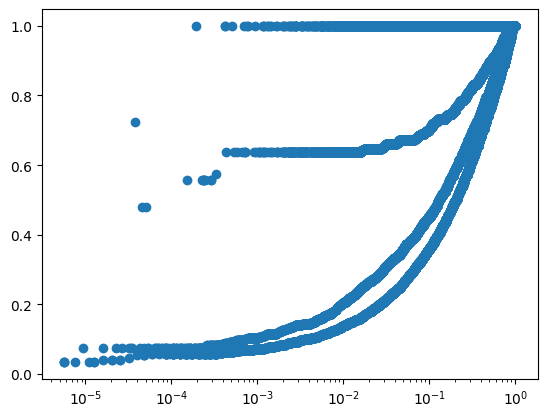

In [592]:
plt.scatter(results_df['pval'],results_df['FDR'],)
plt.xscale('log')

In [594]:
results_df.sort_values(by='FDR', ascending=True)[:20]

,Gene,Cluster,EffectSize,pval,FDR
64696,PCNX2_Expression,1,-1.827032,0.000006,0.034532
62183,ERRFI1_Expression,1,-2.597901,0.000006,0.034532
70365,FEZ2_Expression,1,-1.193833,0.000007,0.034532
58576,TRAM2_Expression,1,-1.634008,0.000006,0.034532
67237,UBASH3B_Expression,1,-1.795207,0.000013,0.034532
70320,TMEM43_Expression,1,-1.058990,0.000013,0.034532
75056,HBM_Expression,1,0.093126,0.000011,0.034532
62032,LOXL3_Expression,1,-4.670237,0.000016,0.038558
68007,SHC1_Expression,1,-1.353187,0.000020,0.039081
62131,RND3_Expression,1,-2.567344,0.000020,0.039081


In [601]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = []

melanoma = cm[cm.OncotreeSubtype=='Glioblastoma'].copy()
clusters = melanoma['Cluster'].unique()
genes = [g for g in melanoma.columns if (g != 'Cluster') & ('Expression' in g)]

for _ in range(1):
    for g in tqdm(genes, desc="Genes"):
        vals_in = melanoma.loc[melanoma['Cluster'] == 2, g]
        vals_out = melanoma.loc[melanoma['Cluster'] != 4, g]
        stat, pval = mannwhitneyu(vals_in, vals_out)
        effect_size = melanoma.loc[melanoma['Cluster'] == 2, g].mean() - melanoma.loc[melanoma['Cluster'] != 2, g].mean()
        results.append({
            'Gene': g,
            'Cluster': 2,
            'EffectSize': effect_size,
            'pval': pval
        })

results_df = pd.DataFrame(results)
results_df['pval'] = results_df['pval'].astype(float)
results_df = pd.DataFrame(results)
tmp = []
for i in range(int(len(results_df)/19221)):
    t = results_df['pval'].iloc[i*19221:(i+1)*19221].values
    t = multipletests(t, method='fdr_bh')[1]
    tmp += t.tolist()
results_df['FDR'] = tmp


Genes:   0%|          | 0/19221 [00:00<?, ?it/s]

In [604]:
results_df[results_df['EffectSize']>0].sort_values(by='pval', ascending=True)[:20]

,Gene,Cluster,EffectSize,pval,FDR
9439,UTRN_Expression,2,0.632015,0.013011,1.0
3733,UBE4A_Expression,2,0.488856,0.013982,1.0
15934,PLET1_Expression,2,0.021446,0.016889,1.0
16936,GPR52_Expression,2,0.024756,0.019606,1.0
3818,ITFG2_Expression,2,0.366133,0.019856,1.0
1687,RBM22_Expression,2,0.314691,0.021261,1.0
14813,BCOR_Expression,2,0.641224,0.027780,1.0
9712,HEATR3_Expression,2,0.440802,0.029611,1.0
10239,CALM3_Expression,2,0.446902,0.029657,1.0
285,AKAP8L_Expression,2,0.354403,0.035949,1.0


In [564]:
results_df[results_df['Cluster']==1]

cls = 1

results_df_c = results_df[results_df['Cluster'] == cls].copy()
print(len(results_df_c))

19221


0
0


<Figure size 600x500 with 0 Axes>

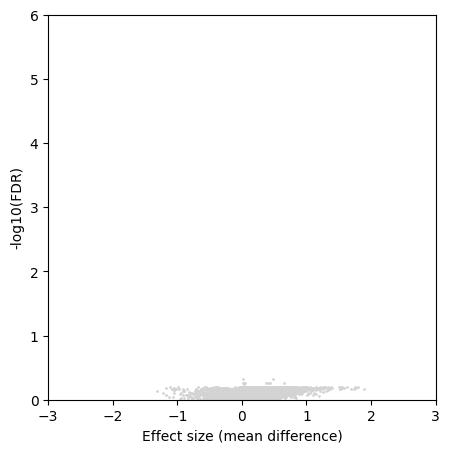

In [596]:
plt.figure(figsize=(6,5))
cls = 3

results_df_c = results_df[results_df['Cluster'] == cls].copy()
results_df_c_focus = results_df_c[
    (abs(results_df_c['EffectSize']) > 0.75) & (results_df_c['FDR'] < 0.1)
]

# Convert FDR to -log10(FDR)
results_df_c['neglogFDR'] = -np.log10(results_df_c['FDR'])
results_df_c_focus['neglogFDR'] = -np.log10(results_df_c_focus['FDR'])

# --- upper bound (e.g. y-limit) ---
upper_y = 5  # you can change this threshold
results_df_c['neglogFDR_clipped'] = results_df_c['neglogFDR'].clip(upper=upper_y)
results_df_c_focus['neglogFDR_clipped'] = results_df_c_focus['neglogFDR'].clip(upper=upper_y)
plt.figure(figsize=(5,5))
# Scatter plot
plt.scatter(
    results_df_c['EffectSize'], results_df_c['neglogFDR_clipped'],
    s=1, color='lightgray', label='All genes'
    )
plt.scatter(
    results_df_c_focus[results_df_c_focus['EffectSize'] > 0.75]['EffectSize'], results_df_c_focus[results_df_c_focus['EffectSize'] > 0.75]['neglogFDR_clipped'],
    s=5, color='red', label='Strong & significant'
)

plt.scatter(
    results_df_c_focus[results_df_c_focus['EffectSize'] < -0.75]['EffectSize'], results_df_c_focus[results_df_c_focus['EffectSize'] < -0.75]['neglogFDR_clipped'],
    s=5, color='blue', label='Strong & significant'
)

print(len(results_df_c_focus[results_df_c_focus['EffectSize'] < -0.75]))
print(len(results_df_c_focus[results_df_c_focus['EffectSize'] > 0.75]))


plt.xlim((-3, 3))
plt.ylim((0, upper_y+1))
plt.xlabel('Effect size (mean difference)')
plt.ylabel('-log10(FDR)')

plt.savefig("../result/figure.svg")
plt.show()


In [560]:
plt.scatter(
    results_df['EffectSize'], results_df['neglogFDR_clipped'],
    s=1, color='lightgray', label='All genes'
    )

KeyError: 'neglogFDR_clipped'

  0%|          | 0/5 [00:00<?, ?it/s]

Error processing cluster 0: 0


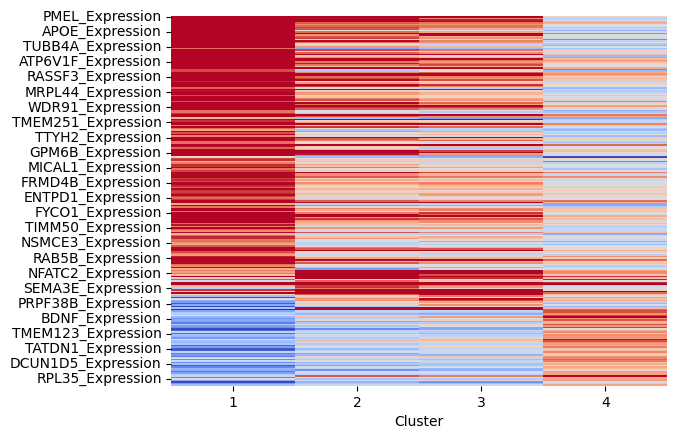

In [546]:
#Fig. 3a
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

norm_ch_ex = pd.DataFrame(StandardScaler().fit_transform(ch_ex), columns=ch_ex.columns, index=ch_ex.index)
norm_ch_ex['Cluster'] = ch_ex['Cluster']
nce2 = norm_ch_ex[b[b[0]>1].index.tolist()+["Cluster"]].loc[melanoma]

ch_exg3 = nce2.groupby("Cluster").mean().copy().T
#ch_exg = norm_ch_ex.groupby("Cluster").mean().copy().T

from tqdm.notebook import tqdm
results = []

for i in tqdm(range(5)):
    try:
        df_filtered = ch_exg3[ch_exg3[i] == ch_exg3.max(axis=1)].copy()
    except Exception as e:
        print(f"Error processing cluster {i}: {e}")
        continue

    df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
    df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=False)
    df_sorted = df_sorted[df_sorted['diff_to_other_mean'] > 1]
    results.append(df_sorted.index.tolist())

rows = []
for i in range(len(results)):
    ex_results = [r for r in results[i] if 'Expression' in r]
    rows += ex_results#[:50]
a = ch_exg3.loc[rows]

results_ex = results
high_exp = ex_results  #Cluster4=Hippo_strong

sns.heatmap(a, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)
plt.savefig("../result/figure.svg")
plt.show()

<Axes: xlabel='Cluster'>

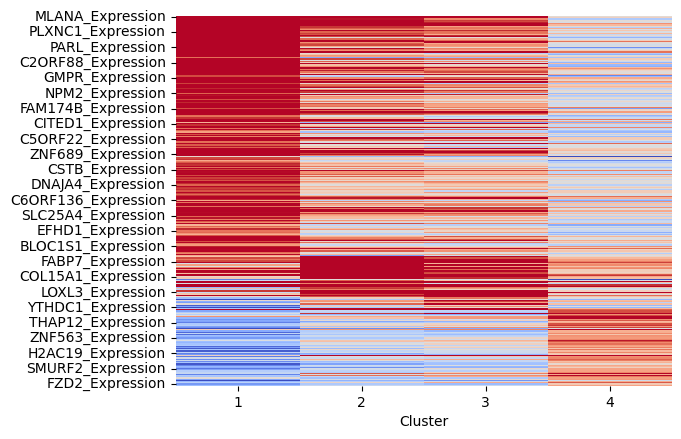

In [484]:
b =a.join(pd.DataFrame(ch_ex.mean()),how='inner')
sns.heatmap(a[b[0]>0.5], cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)


In [479]:
a

Cluster,1,2,3,4
GAGE12G_Expression,5.644112,0.055580,-0.075102,-0.070152
RDH8_Expression,5.743904,1.454054,1.454289,-0.121449
TRPM1_Expression,5.918460,2.589913,1.722381,-0.152310
OR4C5_Expression,4.490434,-0.031623,-0.031623,-0.031623
CNDP1_Expression,4.822174,1.258058,0.249661,0.691242
...,...,...,...,...
COLEC10_Expression,-0.324181,-0.123049,0.175070,0.922356
RGPD2_Expression,-0.663337,-0.382751,-0.179244,0.598508
FOXF1_Expression,-0.337330,0.178452,0.624535,1.159600
FZD2_Expression,-0.941504,-0.464101,-0.631364,0.322537


In [476]:
ch_ex.mean()

A1BG_Chronos        -0.029325
A1CF_Chronos        -0.037561
A2M_Chronos          0.017925
A2ML1_Chronos        0.056177
A3GALT2_Chronos     -0.079761
                       ...   
NPBWR1_Expression    0.297404
ELOA3D_Expression    0.017957
ELOA3_Expression     0.020810
CDR1_Expression      0.057141
Cluster              1.979021
Length: 36608, dtype: float64

In [469]:
effect_sizes = []
i = 0
for ge, cl in sig_in_heatmap[sig_in_heatmap['Cluster']==1][['Gene', 'Cluster']].values:
    if i % 1000 == 0:
        print(i)
    i += 1
    group1 = norm_ch_ex[norm_ch_ex['Cluster'] == cl][ge]
    group2 = norm_ch_ex[norm_ch_ex['Cluster'] != cl][ge]
    effect_size = group1.mean() - group2.mean()
    effect_sizes.append(effect_size)
sig_in_heatmap['EffectSize'] = effect_sizes

0


KeyboardInterrupt: 

In [470]:
sig_in_heatmap[sig_in_heatmap['Cluster']==1]

,Gene,Cluster,p_value,FDR
24002,CCN2_Expression,1,2.461496e-33,4.731241e-29
26102,ETS1_Expression,1,8.385391e-32,8.058780e-28
37873,ITGB3_Expression,1,2.683951e-31,1.115273e-27
29187,PALM2AKAP2_Expression,1,3.152642e-31,1.115273e-27
32927,HSD11B2_Expression,1,2.430708e-31,1.115273e-27
...,...,...,...,...
19330,ZFX_Expression,1,2.470955e-02,4.982417e-02
38364,TEX52_Expression,1,2.472402e-02,4.984481e-02
21442,AP1B1_Expression,1,2.475222e-02,4.989642e-02
23541,SLC35F5_Expression,1,2.478621e-02,4.995971e-02


In [468]:
len(sig_in_heatmap)

43984

In [466]:
sig_in_heatmap[sig_in_heatmap['Cluster']==1][:20]

,Gene,Cluster,p_value,FDR
24002,CCN2_Expression,1,2.461496e-33,4.731241e-29
26102,ETS1_Expression,1,8.385391e-32,8.058780e-28
37873,ITGB3_Expression,1,2.683951e-31,1.115273e-27
29187,PALM2AKAP2_Expression,1,3.152642e-31,1.115273e-27
32927,HSD11B2_Expression,1,2.430708e-31,1.115273e-27
30776,IKBIP_Expression,1,3.481422e-31,1.115273e-27
37334,CKMT1B_Expression,1,5.143751e-31,1.351107e-27
27895,PPP1R18_Expression,1,5.623463e-31,1.351107e-27
20427,AP1M1_Expression,1,3.378561e-30,7.215479e-27
36140,IQANK1_Expression,1,3.875777e-30,7.449632e-27


In [492]:
for g in results[2]:
    if 'Expression' in g:
        print(g.split('_')[0] )

LOXL3
UCN2
TMEM67
ATXN7
RBM25
NPAS1
BACH1
KDM6B
PRPF38B
MAN1A2
YTHDC1
SNED1
C19ORF71
